## Importer les bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
#pour pouvoir installer xgboost directement au niveau de jupiter sans le prompt
#!pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### charger et comprendre les données

In [37]:
iris=pd.read_csv("iris.csv")
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
# Vérifier les types de données et les informations sur les valeurs manquantes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Statistiques descriptives pour les données numériques
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
Sepal.Length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


In [5]:
# afficher les statistiques descriptives pour les champs de votre DataFrame "iris" qui sont de type catégoriel, en excluant les variables numériques.
iris.describe(exclude =np.number).T

,count,unique,top,freq
Species,150,3,setosa,50


Observation

the dataset is complete on sait qu'il n y a pas de valeurs manquantes, ni de valeurs nulles

### analyse exploratoire des données

In [6]:
# calcule de la proportion de chaque catégorie dans la variable 'Species' en pourcentage
iris.Species.value_counts(normalize=True)*100

Species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64

observation

Les proportions sont toutes égales à 33.333333 %, ce qui suggère que les données sont équilibrées et que chaque catégorie représente un tiers des observations.

([<matplotlib.patches.Wedge at 0x16a820721d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

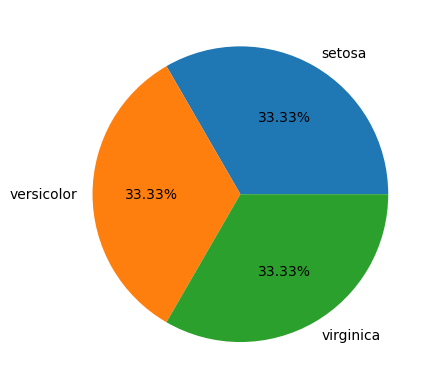

In [7]:
# diagramme circulaire (pie chart) pour visualiser la répartition des valeurs dans la colonne 'Species' 
plt.pie(iris.Species.value_counts(),labels=iris.Species.value_counts().index,autopct='%.2f%%')

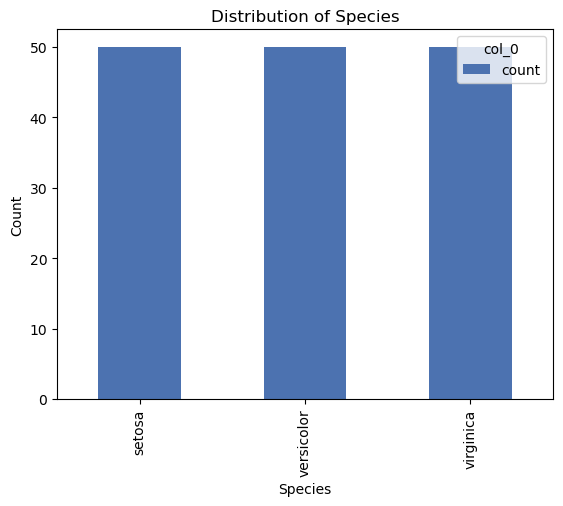

In [8]:
palette = "deep"
sns.set_palette(palette)

# Construire le tableau croisé dynamique entre 'Species' et 'Exited'
Species_exits_crosstab = pd.crosstab(index=iris['Species'], columns='count')

# Tracer un graphique à barres pour le tableau croisé dynamique
Species_exits_crosstab.plot(kind='bar', stacked=True)

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')

plt.show()


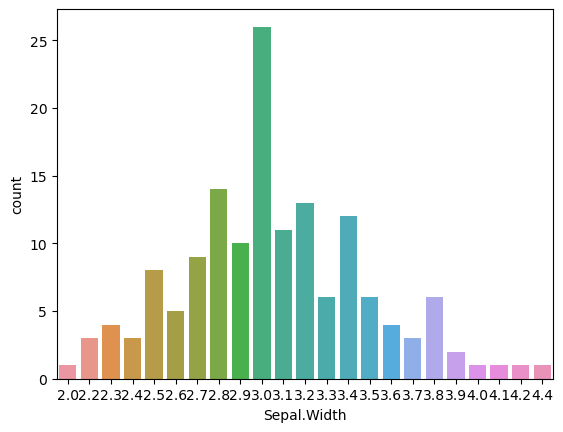

In [9]:
#diagramme à barres pour la colonne "sepal.width" 
sns.countplot(x='Sepal.Width', data=iris)
plt.show()

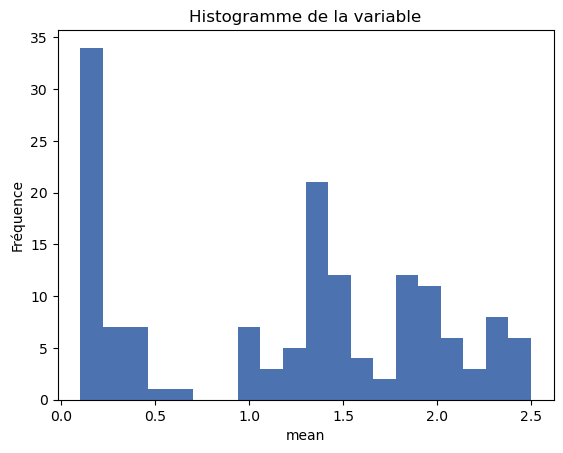

In [10]:
# Histogramme d'une variable numérique
plt.hist(iris['Petal.Width'], bins=20)
plt.xlabel('mean')
plt.ylabel('Fréquence')
plt.title('Histogramme de la variable')
plt.show()


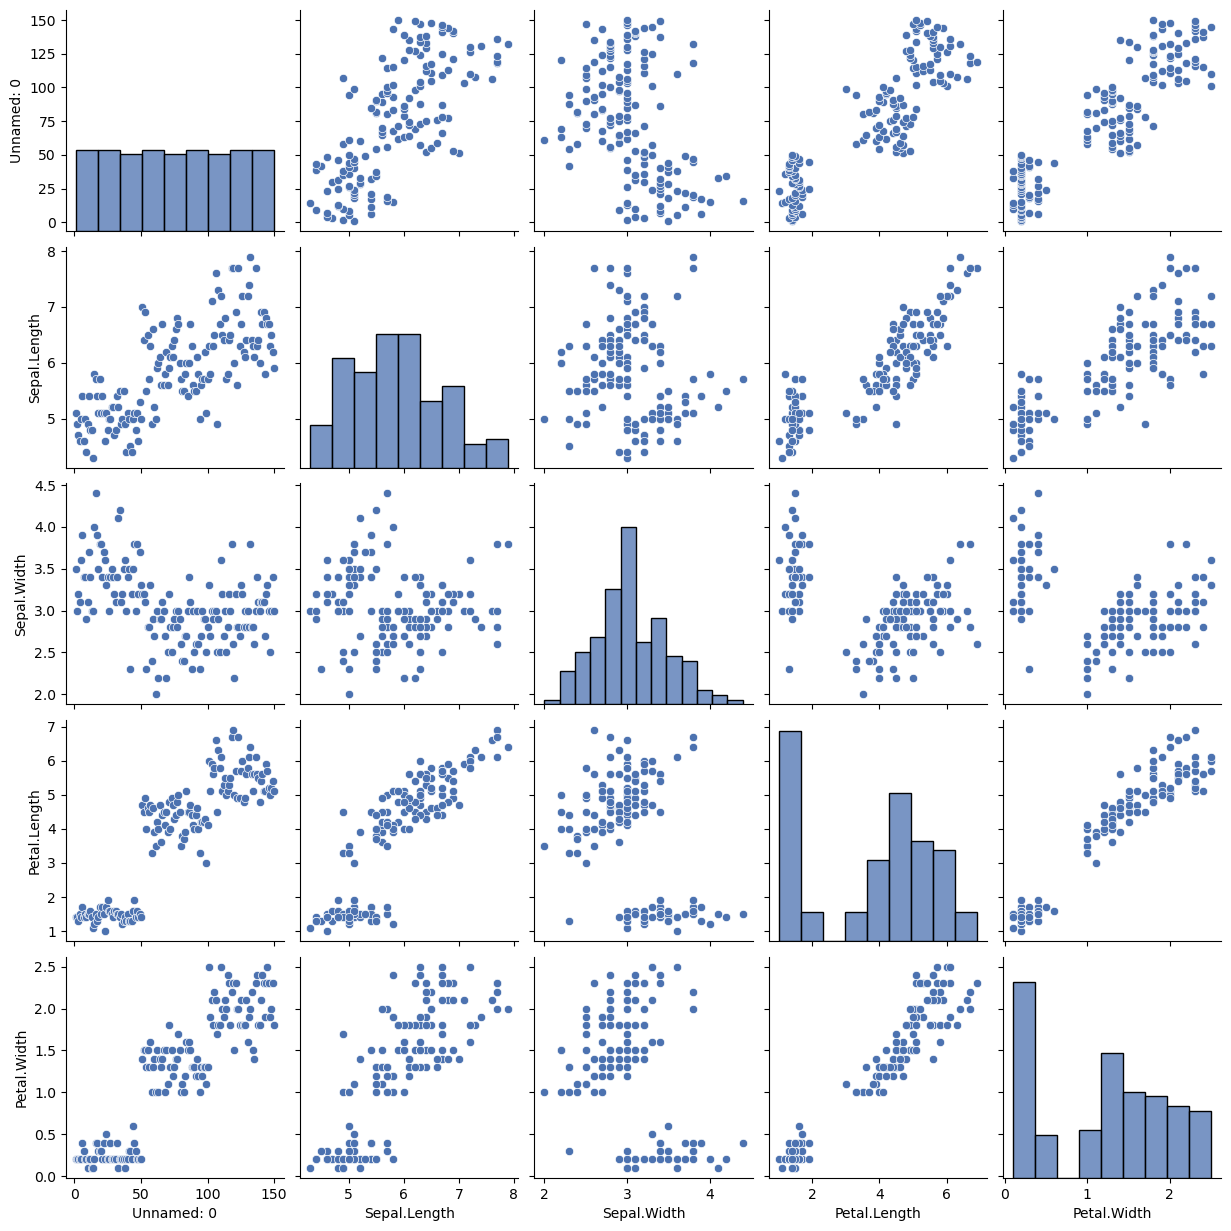

In [11]:
#génère une matrice de graphiques de dispersion pour visualiser les relations bivariées entre les variables numériques 
sns.pairplot(data=iris)

### Transformation des données et construction du modéle 

In [38]:
#suppression de lq colonne unnamed:0
iris.drop('Unnamed: 0',axis=1,inplace=True)

In [39]:
#connaître la taille de votre ensemble de données "iris"
iris.shape

(150, 5)

## encodage

In [40]:
# identify les colonnes categorielle
objvar=[i for i in iris.columns if iris[i].dtype=='object']
objvar

['Species']

In [41]:
#Effectuer un encodage 
iris['Species']=iris['Species'].replace({'setosa':0,'versicolor':1,'virginica':2})

In [43]:
df=iris
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## normalisation
Nous allons appliquer une normalisation afin de standardiser les échelles des valeurs numériques dans une plage cohérente.

In [53]:
# identifier les colonnes 
objnum=[i for i in iris.columns if iris[i].dtype=='int64' or iris[i].dtype=='float64']
objnum

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

### construction du modele

In [54]:
# Séparation des fonctionnalités (X) et de la cible (y)
X = iris.drop('Species', axis=1)  # Caractéristiques
y = iris.Species                # Variable cible


In [55]:
#divise vos données en un ensemble d'entraînement et un ensemble de test, puis affiche la forme de chacun de ces ensembles
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=17)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [56]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, Xtrain,Ytrain, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.9583
Average Precision: 0.9590
Average Recall: 0.9571
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.9417
Average Precision: 0.9405
Average Recall: 0.9488
-----------------------
Classifier: Random Forest
Average Accuracy: 0.9500
Average Precision: 0.9421
Average Recall: 0.9488
-----------------------
Classifier: KNN
Average Accuracy: 0.9667
Average Precision: 0.9719
Average Recall: 0.9655
-----------------------
Classifier: XGB
Average Accuracy: 0.9500
Average Precision: 0.9497
Average Recall: 0.9488
-----------------------


In [57]:
#Method pour evaluer la performance du model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    #Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Créer une carte thermique de la matrice de confusion en utilisant Seaborn
    sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30


---------------------------------------------



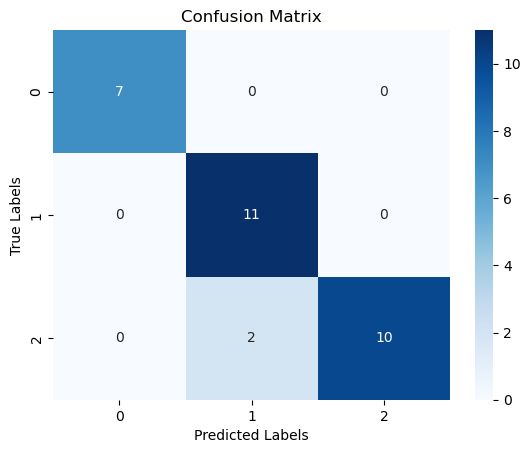

In [58]:


# Initialiser le classifieur KNN
knnclassifier = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle XGBoost
knnclassifier.fit(Xtrain, Ytrain)

# Prédiction sur les données de test
ypred = knnclassifier.predict(Xtest)

# Évaluation du modèle
evaluate_model(Ytest, ypred)


## model saving

In [62]:
import joblib
# Sauvegarder le modèle dans un fichier
joblib.dump(knnclassifier, 'iris_model.pkl')


['iris_model.pkl']